# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'q=' + city + '&appid=' + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | dingcheng
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | howard springs
Processing Record 5 of Set 1 | virginia
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | oamaru
Processing Record 8 of Set 1 | polyarnyy
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | maragogi
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | guacamayas
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | crane
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | gadzhiyevo
Processing Record 22 of Set 1 | bilibino
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.53,66,42,10.45,TF,1712193312
1,dingcheng,32.1272,115.0394,12.15,82,99,5.08,CN,1712193377
2,puerto natales,-51.7236,-72.4875,2.77,84,100,6.78,CL,1712193372
3,howard springs,-12.4970,131.0470,31.04,72,22,3.72,AU,1712193377
4,virginia,37.5481,-77.4467,12.25,94,100,6.17,US,1712193282


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.53,66,42,10.45,TF,1712193312
1,dingcheng,32.1272,115.0394,12.15,82,99,5.08,CN,1712193377
2,puerto natales,-51.7236,-72.4875,2.77,84,100,6.78,CL,1712193372
3,howard springs,-12.4970,131.0470,31.04,72,22,3.72,AU,1712193377
4,virginia,37.5481,-77.4467,12.25,94,100,6.17,US,1712193282


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

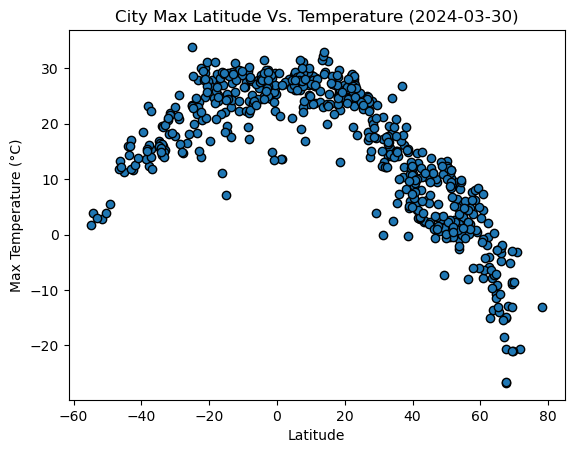

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (°C)')
ax.set_title('City Max Latitude Vs. Temperature (2024-03-30)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

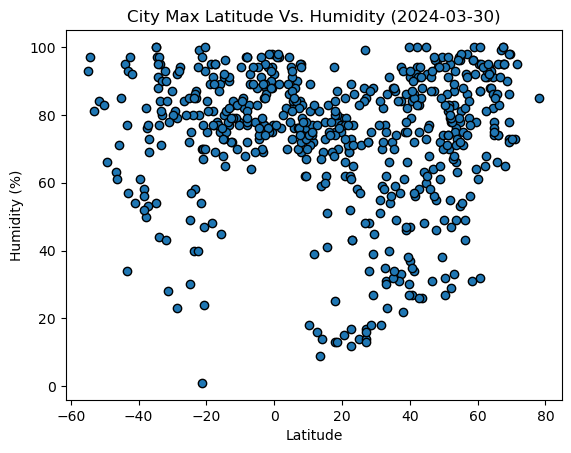

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_title('City Max Latitude Vs. Humidity (2024-03-30)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

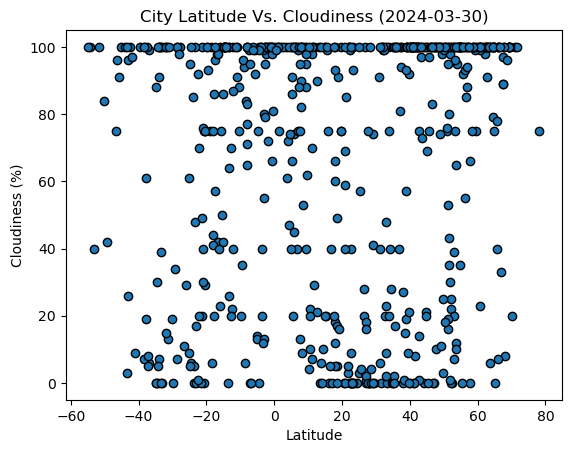

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, edgecolors='black')


# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.set_title('City Latitude Vs. Cloudiness (2024-03-30)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

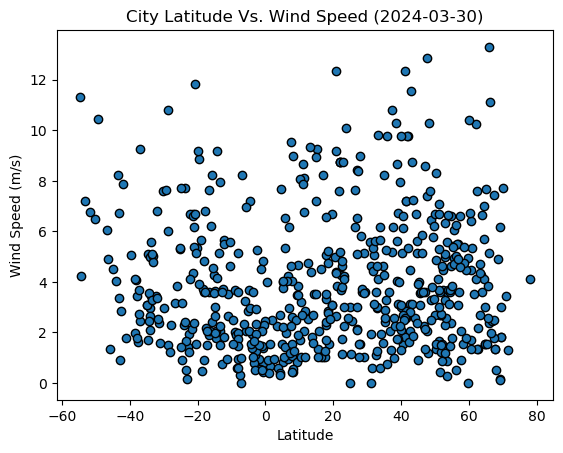

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('City Latitude Vs. Wind Speed (2024-03-30)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_Regreesion_plot(x_values, y_values, x_label, y_label, x_line_position, y_line_position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r')
    plt.annotate(line_eq,(x_line_position,y_line_position),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f'The r-value squared is: {rvalue**2}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dingcheng,32.1272,115.0394,12.15,82,99,5.08,CN,1712193377
4,virginia,37.5481,-77.4467,12.25,94,100,6.17,US,1712193282
5,lihue,21.9789,-159.3672,28.58,69,100,8.75,US,1712193293
7,polyarnyy,69.1989,33.4478,-8.91,73,100,0.16,RU,1712193378
8,olonkinbyen,70.9221,-8.7187,-3.12,73,100,3.43,SJ,1712193378


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.53,66,42,10.45,TF,1712193312
2,puerto natales,-51.7236,-72.4875,2.77,84,100,6.78,CL,1712193372
3,howard springs,-12.4970,131.0470,31.04,72,22,3.72,AU,1712193377
6,oamaru,-45.0784,170.9801,11.32,85,100,4.49,NZ,1712193377
9,maragogi,-9.0122,-35.2225,27.47,82,94,2.01,BR,1712193333


###  Temperature vs. Latitude Linear Regression Plot

The r-value squared is: 0.8254054296372716


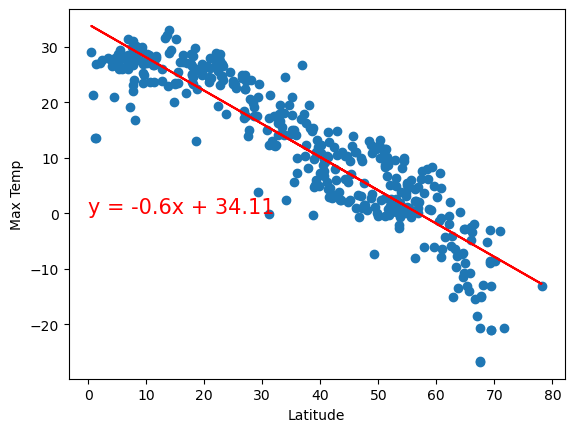

In [15]:
# Linear regression on Northern Hemisphere
linear_Regreesion_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp',0,0)

The r-value squared is: 0.5363503597970775


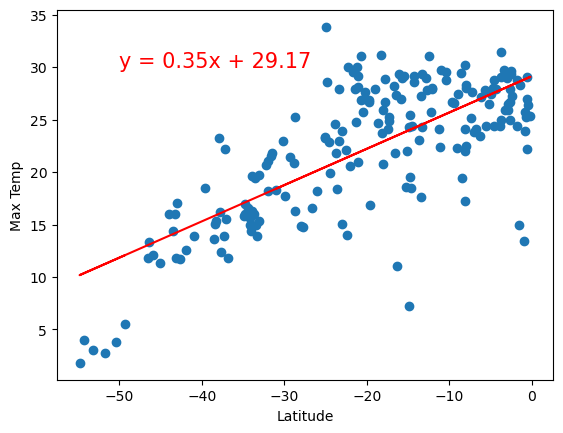

In [16]:
# Linear regression on Southern Hemisphere
linear_Regreesion_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp',-50,30)

**Discussion about the linear relationship:** With the northern hemisphere, the linear regression plot shows that there is a strong linear relationship between the maximum temperature and the latitude. This supports the idea that as you move further north (assuming you're in the northern hemisphere) you see a decrease in temperature. Similarly, when we look at the southern hemisphere linear regression plot and we can see that there is a moderately strong linear relationship between temperature and latitude. This suggests that the further south you move (assuming you're in the southern hemisphere) the lower temperature becomes.

### Humidity vs. Latitude Linear Regression Plot

The r-value squared is: 0.023212495323355196


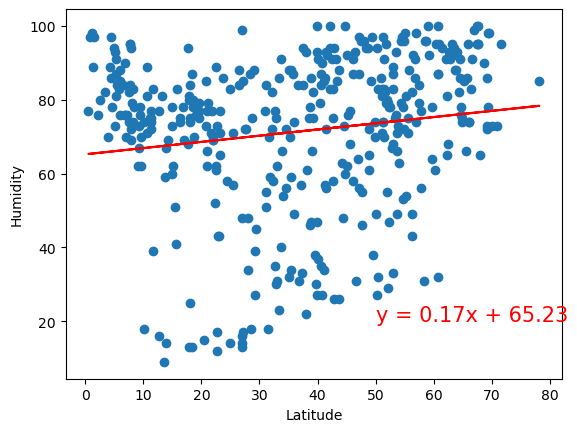

In [17]:
# Northern Hemisphere
linear_Regreesion_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity',50,20)

The r-value squared is: 0.03660153163901386


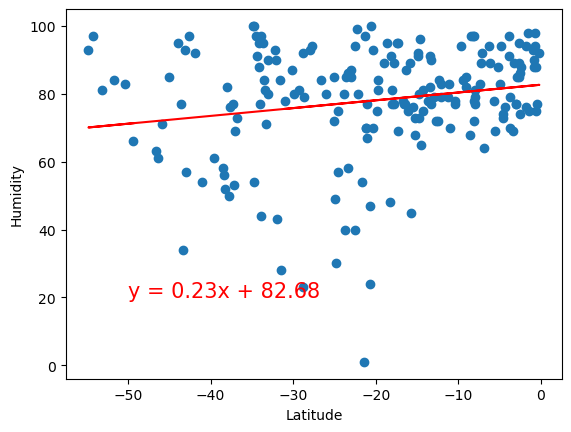

In [18]:
# Southern Hemisphere
linear_Regreesion_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity',-50,20)

**Discussion about the linear relationship:** When we look at both graphs, we can see that there is a fairly weak correlation between humidity and latitude position. The points in both graphs might suggest that as you move further away from the equator humidity increases slightly, but given how weak the correlation is, it's really hard to say.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value squared is: 0.03072226679020597


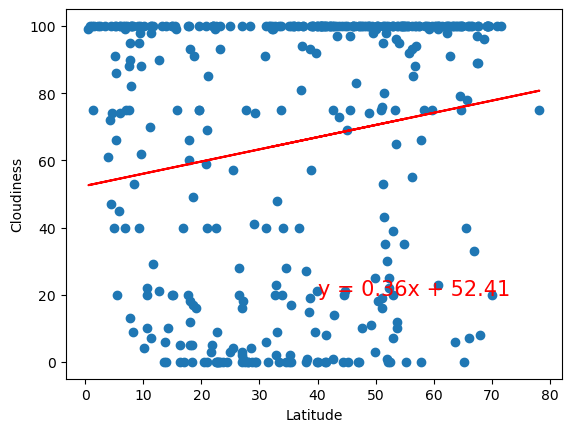

In [19]:
# Northern Hemisphere
linear_Regreesion_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness',40,20)

The r-value squared is: 0.02107863898528272


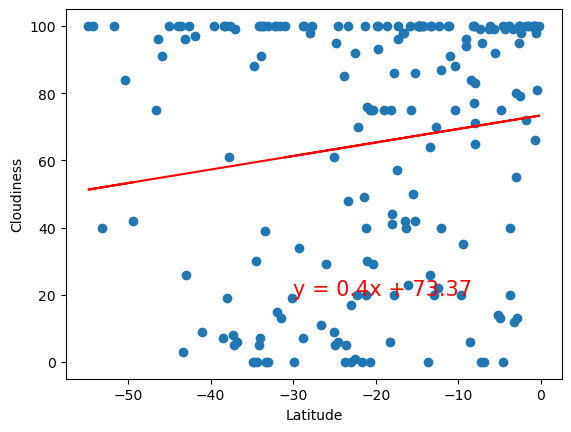

In [20]:
# Southern Hemisphere
linear_Regreesion_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness',-30,20)

**Discussion about the linear relationship:** In both of these graphs, we see a fairly weak correlation between cloudiness and latitude. As you look closer at the data points, you can see that the points have a slight tendency to clump at either 100 or 0 percent cloudiness, but there doesn't appear to be a strong connection between this and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value squared is: 0.005144892094963992


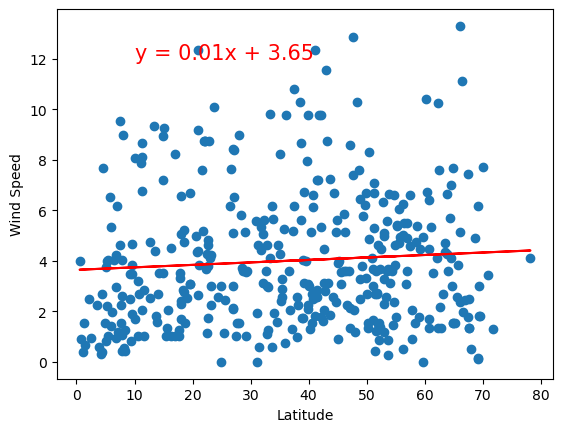

In [21]:
# Northern Hemisphere
linear_Regreesion_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed',10,12)

The r-value squared is: 0.12365149031870128


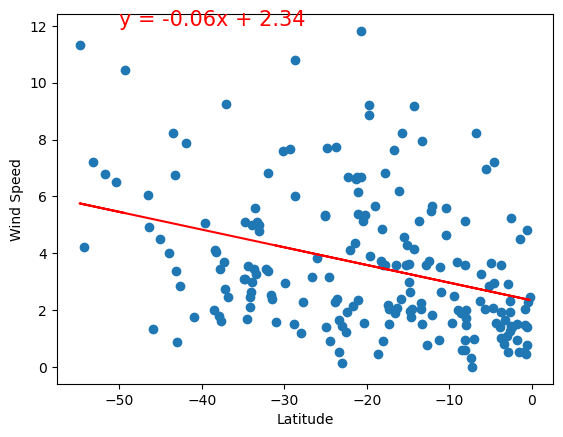

In [22]:
# Southern Hemisphere
linear_Regreesion_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed',-50,12)

**Discussion about the linear relationship:** As we look at both graphs, both seem to have a fairly weak linear relationship. It appears that, regardless of latitude, wind speed tends to be pretty scattered with no strong relationship of any kind.